## **Credit Card  Fraud Detection**

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [193]:
df = pd.read_csv(r'C:\Users\Priti\Desktop\corpnce_data_science\kaggle proj\creditcardfraud\creditcard.csv', nrows=100000)
df.shape

(100000, 31)

In [194]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [195]:
df.info()

#no null values in dataset and all the features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
Time      100000 non-null int64
V1        100000 non-null float64
V2        100000 non-null float64
V3        100000 non-null float64
V4        100000 non-null float64
V5        100000 non-null float64
V6        100000 non-null float64
V7        100000 non-null float64
V8        100000 non-null float64
V9        100000 non-null float64
V10       100000 non-null float64
V11       100000 non-null float64
V12       100000 non-null float64
V13       100000 non-null float64
V14       100000 non-null float64
V15       100000 non-null float64
V16       100000 non-null float64
V17       100000 non-null float64
V18       100000 non-null float64
V19       100000 non-null float64
V20       100000 non-null float64
V21       100000 non-null float64
V22       100000 non-null float64
V23       100000 non-null float64
V24       100000 non-null float64
V25       100000 non-null float64
V26     

In [196]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,42433.231550,-0.262177,-0.032307,0.676217,0.162579,-0.278515,0.094065,-0.108711,0.056019,-0.046472,...,-0.030865,-0.109090,-0.037024,0.008969,0.132206,0.026658,0.000624,0.001736,97.961222,0.00223
std,17044.922359,1.859226,1.656981,1.322926,1.349263,1.356372,1.301349,1.210919,1.207526,1.121396,...,0.718890,0.634306,0.632908,0.595267,0.441080,0.494539,0.393742,0.325162,264.623031,0.04717
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.00000
25%,33471.750000,-1.028141,-0.598697,0.176770,-0.711468,-0.898664,-0.647830,-0.600205,-0.137456,-0.698812,...,-0.224512,-0.531327,-0.176415,-0.323714,-0.131788,-0.325102,-0.062533,-0.005355,7.570000,0.00000
50%,44299.000000,-0.260557,0.078316,0.753976,0.192550,-0.314382,-0.157014,-0.069096,0.074136,-0.119083,...,-0.057669,-0.083865,-0.049238,0.064997,0.170110,-0.070333,0.009833,0.023318,26.310000,0.00000
75%,55851.250000,1.153324,0.735790,1.376320,1.032416,0.249727,0.486353,0.414662,0.360529,0.558314,...,0.119186,0.308337,0.081526,0.406280,0.419929,0.300675,0.083027,0.076569,89.000000,0.00000
max,67375.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.00000


In [197]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    99777
1      223
Name: Class, dtype: int64


(array([99777.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   223.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

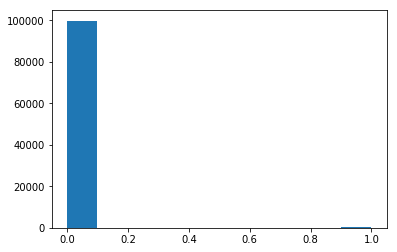

In [198]:
#Our label is Class
#0 means not fraud, 1 is fraud

print(df['Class'].value_counts())

plt.hist(df['Class'])

In [199]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [200]:
#Time is in seconds,and the numbers are big compared to other features as they are already standerdized values
#Hence converting seconds into hours

def time(x):
    x = x/3600
    return x

In [201]:
df['Time'] = df.Time.apply(time)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,11.787009,-0.262177,-0.032307,0.676217,0.162579,-0.278515,0.094065,-0.108711,0.056019,-0.046472,...,-0.030865,-0.109090,-0.037024,0.008969,0.132206,0.026658,0.000624,0.001736,97.961222,0.00223
std,4.734701,1.859226,1.656981,1.322926,1.349263,1.356372,1.301349,1.210919,1.207526,1.121396,...,0.718890,0.634306,0.632908,0.595267,0.441080,0.494539,0.393742,0.325162,264.623031,0.04717
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.00000
25%,9.297708,-1.028141,-0.598697,0.176770,-0.711468,-0.898664,-0.647830,-0.600205,-0.137456,-0.698812,...,-0.224512,-0.531327,-0.176415,-0.323714,-0.131788,-0.325102,-0.062533,-0.005355,7.570000,0.00000
50%,12.305278,-0.260557,0.078316,0.753976,0.192550,-0.314382,-0.157014,-0.069096,0.074136,-0.119083,...,-0.057669,-0.083865,-0.049238,0.064997,0.170110,-0.070333,0.009833,0.023318,26.310000,0.00000
75%,15.514236,1.153324,0.735790,1.376320,1.032416,0.249727,0.486353,0.414662,0.360529,0.558314,...,0.119186,0.308337,0.081526,0.406280,0.419929,0.300675,0.083027,0.076569,89.000000,0.00000
max,18.715278,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.00000


In [202]:
#Again column Amount is not standerdised as all other featurs are standerdised, Let's standerdize Amount column

from sklearn.preprocessing import StandardScaler

In [203]:
#Series in a vector, so converting it into 2D array as StandardScaler acepts only 2D arrays

amount = np.array(df['Amount'])
amount = amount.reshape(-1,1)
amount.shape

(100000, 1)

In [204]:
#Standerdized amount column

std = StandardScaler()
amount_std = std.fit_transform(amount)
amount_std

array([[ 0.19521746],
       [-0.36002799],
       [ 1.06075492],
       ...,
       [-0.20013937],
       [-0.2648355 ],
       [-0.32953163]])

In [205]:
#Drop original Amount column and concatenate the std one

df.drop(['Amount'],axis=1,inplace=True)

In [206]:
amount = pd.DataFrame(amount_std)

In [207]:
df = pd.concat([df,amount],axis=1)

In [208]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,0
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.195217
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.360028
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.060755
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.096511
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.105703


In [209]:
#keep a safe copy of original df
df_new = df.copy()

In [210]:
#label
y = df['Class']

In [211]:
df.drop(['Class'],axis=1,inplace=True)

In [212]:
#feature matrix

X=df
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,0
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.195217
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.360028
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.060755
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.096511
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.105703


In [213]:
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import neural_network
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from xgboost import XGBClassifier

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=43)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 30)
(20000, 30)
(80000,)
(20000,)


**Fit, predict and evaluate SVM classifier model**

In [215]:
svm = SVC()
print('Cross validation score for SVM is:',cross_val_score(svm,X_train,y_train,cv=10,scoring='accuracy').mean()*100)

C:\Users\Priti\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Priti\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Priti\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Priti\AppData\Ro

Cross validation score for SVM is: 99.91625046841797


In [216]:
svm.fit(X_train,y_train)

C:\Users\Priti\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [217]:
pred_svm = svm.predict(X_test)
pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
print('Test accuracy for SVM is:', metrics.accuracy_score(y_test,pred_svm)*100)

Test accuracy for SVM is: 99.905


**Build Random Forest Classifeir**

In [219]:
rf = RandomForestClassifier(n_estimators=50,random_state=43)
print('Cross validation score for random forest is:',cross_val_score(rf,X_train,y_train,cv=10,scoring='accuracy').mean()*100)

Cross validation score for random forest is: 99.95250062484375


In [220]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

In [221]:
pred_rf = rf.predict(X_test)
pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [222]:
print('Test accuracy for Random Forest is:', metrics.accuracy_score(y_test,pred_rf)*100)

Test accuracy for Random Forest is: 99.95


**Let's try Neural Network**

In [223]:
nn = neural_network.MLPClassifier()
print('Cross validation score for XGBoost classifier is:',cross_val_score(nn,X_train,y_train,cv=10,scoring='accuracy').mean()*100)

Cross validation score for XGBoost classifier is: 99.95375046857421


In [224]:
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [225]:
pred_nn = nn.predict(X_test)
pred_nn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [226]:
print('Test accuracy for Neural Network is:', metrics.accuracy_score(y_test,pred_nn)*100)

Test accuracy for Neural Network is: 99.955


**Result and conclusion:**

I have taken 100000 rows for train and testing the credit card fraud. And the nullrate for fraud detection is **99.77**

I have tried  Random Forest, SVM classifier and Neural Network to predict the fraud and below are the results:

**SVM Classifier**

Cross validation score for SVM is: 99.91625046841797

Test accuracy for SVM is: 99.905

**Random Forest Classifier**

Cross validation score for random forest is: 99.95250062484375

Test accuracy for random forest is : 99.95

**Neural Network Classifier**

Cross validation score for neural network is: 99.9400006248047

Test accuracy for Neural Network is:  99.94



**As random forest classifies the fraud better, let's analyse the results**

In [227]:
print('Total number of samples tested to detect fraud is: ',len(y_test))
print('Number of frauds classified correctly:' ,(pred_rf == y_test).sum())

Total number of samples tested to detect fraud is:  20000
Number of frauds classified correctly: 19990


In [228]:
print('Accuracy of using Random forest to detect fraud is :',metrics.accuracy_score(y_test,pred_rf)*100)

#99.95% time fraud is detected correctly

Accuracy of using Random forest to detect fraud is : 99.95


In [229]:
#let's check how many fraud and non-fraud values are here in test set
y_test.value_counts()

#19946 non-frauds
#54 frauds

0    19946
1       54
Name: Class, dtype: int64

In [230]:
metrics.confusion_matrix(y_test,pred_rf)

array([[19946,     0],
       [   10,    44]], dtype=int64)

**From confusion matrix we could see all 19946 non-frauds are detected correctly. But it failed to detect 10 fraud cases out of total 54.**

In [231]:
print('\n',metrics.classification_report(y_test,pred_rf))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19946
           1       1.00      0.81      0.90        54

   micro avg       1.00      1.00      1.00     20000
   macro avg       1.00      0.91      0.95     20000
weighted avg       1.00      1.00      1.00     20000



In [232]:
metrics.precision_score(y_test,pred_rf)

1.0

In [233]:
metrics.recall_score(y_test,pred_rf)

0.8148148148148148

In [234]:
metrics.f1_score(y_test,pred_rf)

0.8979591836734693

In [235]:
metrics.roc_auc_score(y_test,pred_rf)

0.9074074074074074